In [149]:
import investpy as inv
# Load packages
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
import warnings                                  # do not disturbe mode
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error


In [150]:
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [151]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [170]:
%%time
bitcoin = inv.get_crypto_historical_data(crypto = 'bitcoin',
                                        from_date = '01/01/2019',
                                        to_date = '22/11/2021')

Wall time: 2.02 s


In [171]:
bitcoin.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-01-01,3709.5,3814.3,3664.4,3809.4,469107,USD
2019-01-02,3809.7,3894.8,3768.1,3873.8,554471,USD
2019-01-03,3874.1,3875.8,3753.0,3780.1,450319,USD
2019-01-04,3780.5,3823.9,3720.0,3802.7,488698,USD
2019-01-05,3802.8,3846.7,3769.0,3785.4,468449,USD


<AxesSubplot:xlabel='Date'>

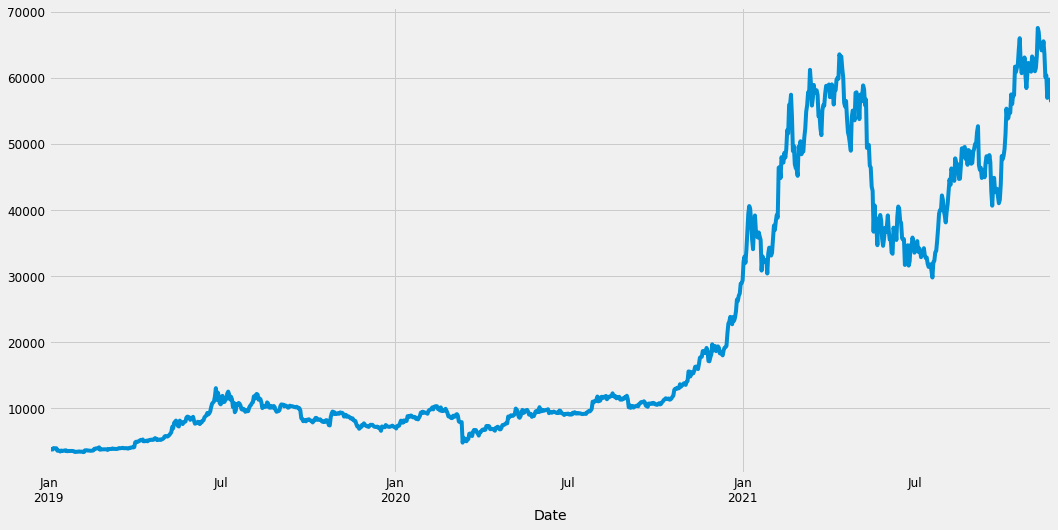

In [172]:
bitcoin.Close.plot(figsize = (16,8))

In [155]:
%%time
eth = inv.get_crypto_historical_data(crypto = 'ethereum',
                                        from_date = '01/01/2019',
                                        to_date = '21/11/2021')

Wall time: 1.68 s


In [156]:
eth.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-01-01,131.90,140.51,130.67,139.61,3053350,USD
2019-01-02,139.58,155.93,138.74,152.95,5511607,USD
2019-01-03,152.96,154.30,144.39,146.94,4018093,USD
2019-01-04,146.94,155.40,145.29,152.86,4923992,USD
2019-01-05,152.87,159.78,152.84,153.49,4847379,USD


In [157]:
eth = pd.DataFrame(eth)

<AxesSubplot:xlabel='Date'>

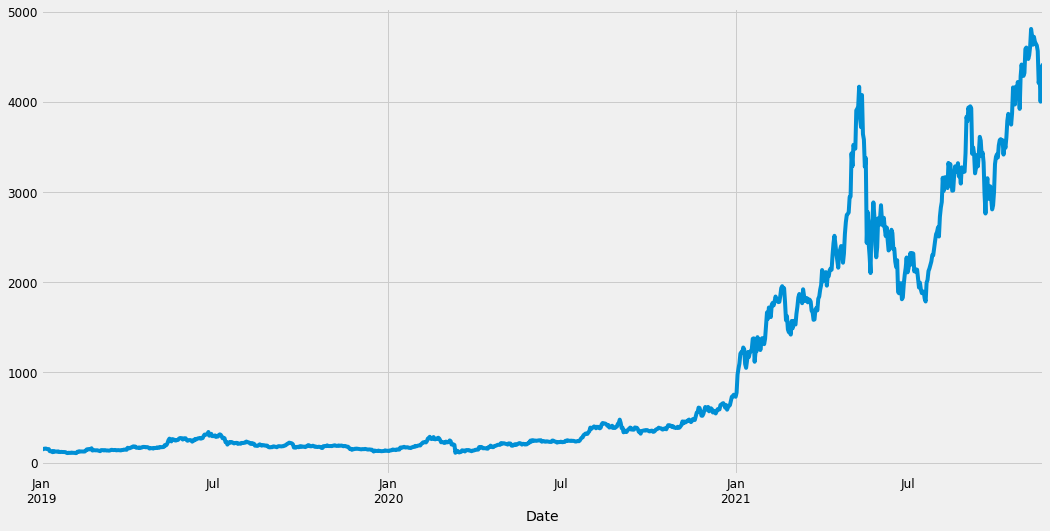

In [158]:
eth.Close.plot(figsize = (16,8))

In [159]:
col=['Open', 'High', 'Low', 'Volume', 'Currency']

eth.drop(col, axis=1,inplace=True)

In [160]:
eth.shape
eth.describe()


,Close
count,1056.000000
mean,973.622538
std,1222.340925
min,104.550000
25%,176.012500
50%,264.990000
75%,1767.832500
max,4808.380000


In [161]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1056 entries, 2019-01-01 to 2021-11-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1056 non-null   float64
dtypes: float64(1)
memory usage: 16.5 KB


In [162]:
#No messing value
eth.isnull().sum()

Close    0
dtype: int64

In [163]:
eth.head()

,Close
Date,
2019-01-01,139.61
2019-01-02,152.95
2019-01-03,146.94
2019-01-04,152.86
2019-01-05,153.49


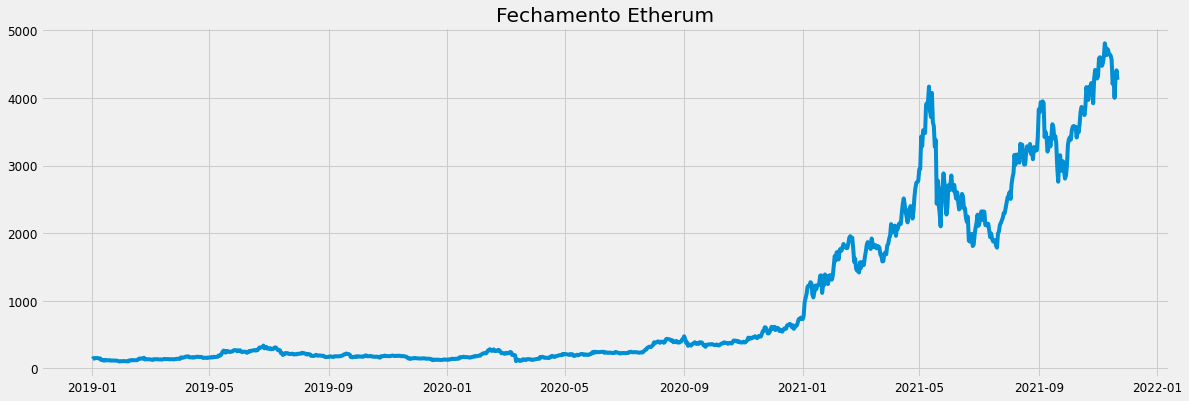

In [164]:
plt.figure(figsize=(18, 6))
plt.plot(eth)
plt.title("Fechamento Etherum")
plt.show()

In [168]:
eth.rename( columns={
    'Close' : 'value'
    
}, inplace=True )

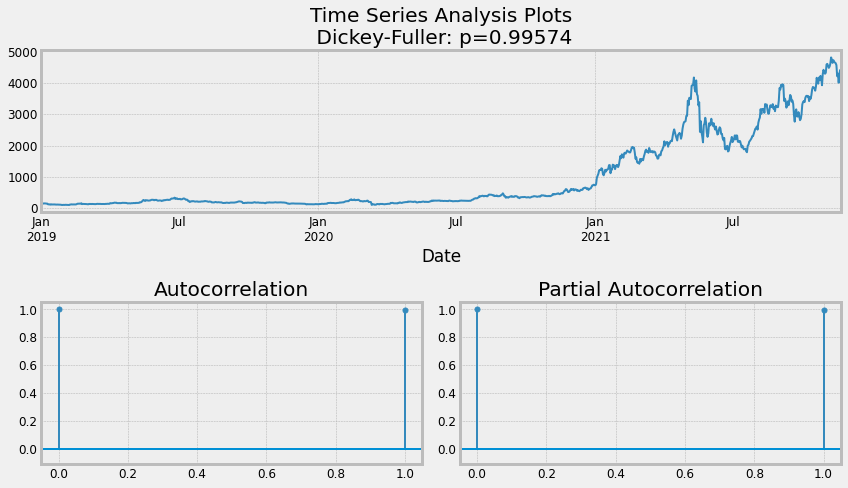

In [169]:
tsplot(eth.value,lags=1)